# Lecture 8: Digital Image Processing

#### Filters


## Objectives

- To undertand low pass or smoothing filters
- To undertand high pass or sharpening filters
- To undertand guassian averaging filter
- To understand linear filters
- To understand non-linear filters


---


## Importing the Required Libraries


In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## Reading the Images

Reading the image using the imread() function of the cv2 library and storing it in the variable image. Convert the image to grayscale using the cvtColor() function of the cv2 library.


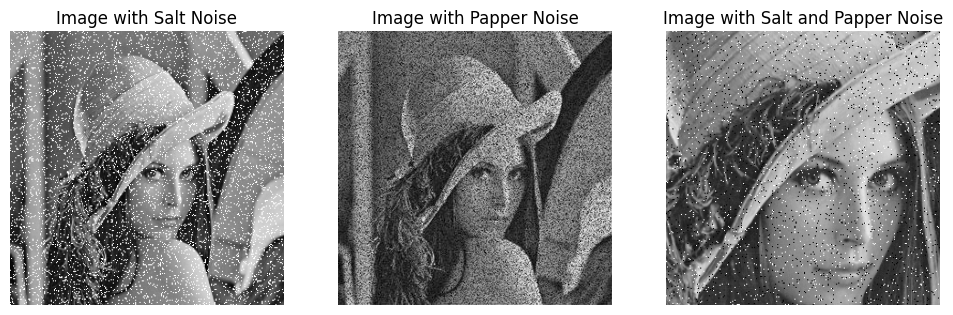

In [56]:
salt = cv2.imread("salt_noise.png")
salt = cv2.cvtColor(salt, cv2.COLOR_BGR2GRAY)

papper = cv2.imread("papper_noise.png")
papper = cv2.cvtColor(papper, cv2.COLOR_BGR2GRAY)

salt_papper = cv2.imread("salt_papper_noise.png")
salt_papper = cv2.cvtColor(salt_papper, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(12, 10))

# Plot the images
plt.subplot(1, 3, 1)
plt.imshow(salt, cmap="gray")
plt.title("Image with Salt Noise")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(papper, cmap="gray")
plt.title("Image with Papper Noise")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(salt_papper, cmap="gray")
plt.title("Image with Salt and Papper Noise")
plt.axis("off")

plt.show()

## Plotter Function after Applying given Filter

This function takes list of images and list of kernal sizes as input and plots the images after applying the given filter.

Inputs:

- images: list of images
- kernels: list of kernal sizes
- filter: function to apply on the image


In [57]:
def filter_plotter(images, kernels, function):
    # Define the number of rows and columns for your subplots
    num_rows = len(images)
    num_cols = len(kernels) + 1  # Plus 1 for the original images

    plt.figure(figsize=(12, 10))  # Adjust the figure size as needed

    for i in range(num_rows):
        # Plot the original image
        plt.subplot(num_rows, num_cols, i * num_cols + 1)
        plt.imshow(images[i], cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        # Plot the images after applying averaging filters
        for j in range(len(kernels)):
            plt.subplot(num_rows, num_cols, i * num_cols + j + 2)
            plt.imshow(function(images[i], kernels[j]), cmap="gray")
            plt.title(f"After Filter Size {kernels[j]}x{kernels[j]}")
            plt.axis("off")

    plt.show()

## Defining List of Images and List of Kernel Sizes


In [58]:
images = [salt, papper, salt_papper]
kernels = [3, 5, 7]

## Averaging Filter

The averaging filter is a simple and frequently used filter for smoothing images. The averaging filter is a low pass filter. The averaging filter works by moving through the image pixel by pixel, replacing each value with the average value of neighboring pixels, including itself. The averaging filter is also called a box filter or a mean filter.

Write a function called averaging_filter() that takes the image and the kernel size as the input parameters and returns the filtered image.


In [59]:
def averaging_filter(image, kernel):
    image_height, image_width = image.shape

    # Create a kernal array
    kernal_array = np.ones((kernel, kernel))
    kernal_array = kernal_array / (kernel * kernel)
    kernal_height, kernal_width = kernal_array.shape

    # Create a new image with the same size as the original image
    new_image = np.zeros(image.shape)

    # Iterate over every pixel of the image
    for i in range(kernel - 1, image_height - kernel):
        for j in range(kernel - 1, image_width - kernel):
            neighbourhood = image[i - math.floor(kernal_height / 2) : i + math.floor(kernal_height / 2) + 1, j - math.floor(kernal_width / 2) : j + math.floor(kernal_width / 2) + 1]

            # Multiply the kernal and the image neighbourhood
            kernal_multiply = neighbourhood * kernal_array

            # Sum the result and store it in the new image
            new_image[i, j] = np.sum(kernal_multiply)

    return new_image

## Apllying Averaging Filter


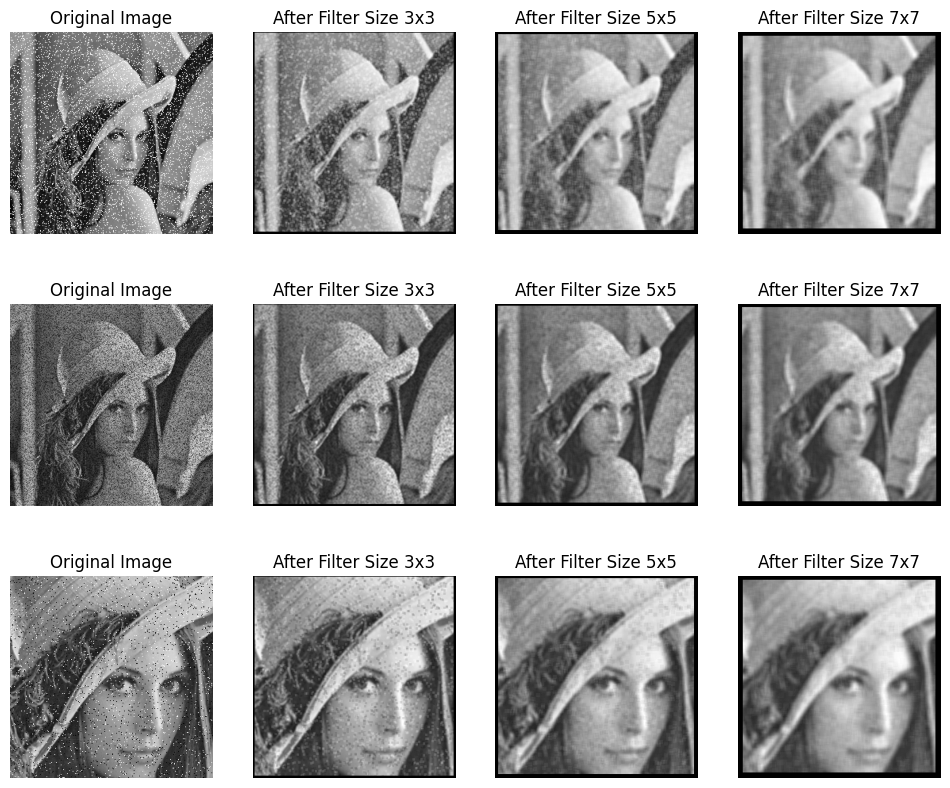

In [60]:
filter_plotter(images, kernels, averaging_filter)

## Min Filter

The min filter is a non-linear filter that is most commonly used as a simple way to reduce noise in an image. The min filter works by moving through the image pixel by pixel, replacing each value with the minimum value of neighboring pixels, including itself.


In [64]:
def min_filter(image, kernel):
    image_height, image_width = image.shape

    # Create a kernal array
    kernal_array = np.ones((kernel, kernel))
    kernal_array = kernal_array / (kernel * kernel)
    kernal_height, kernal_width = kernal_array.shape

    # Create a new image with the same size as the original image
    new_image = np.zeros(image.shape)

    # Iterate over every pixel of the image
    for i in range(kernel - 1, image_height - kernel):
        for j in range(kernel - 1, image_width - kernel):
            neighbourhood = image[i - math.floor(kernal_height / 2) : i + math.floor(kernal_height / 2) + 1, j - math.floor(kernal_width / 2) : j + math.floor(kernal_width / 2) + 1]

            # Chose the median value and store it in the new image
            new_image[i, j] = np.min(neighbourhood.flatten())

    return new_image

## Apllying Min Filter


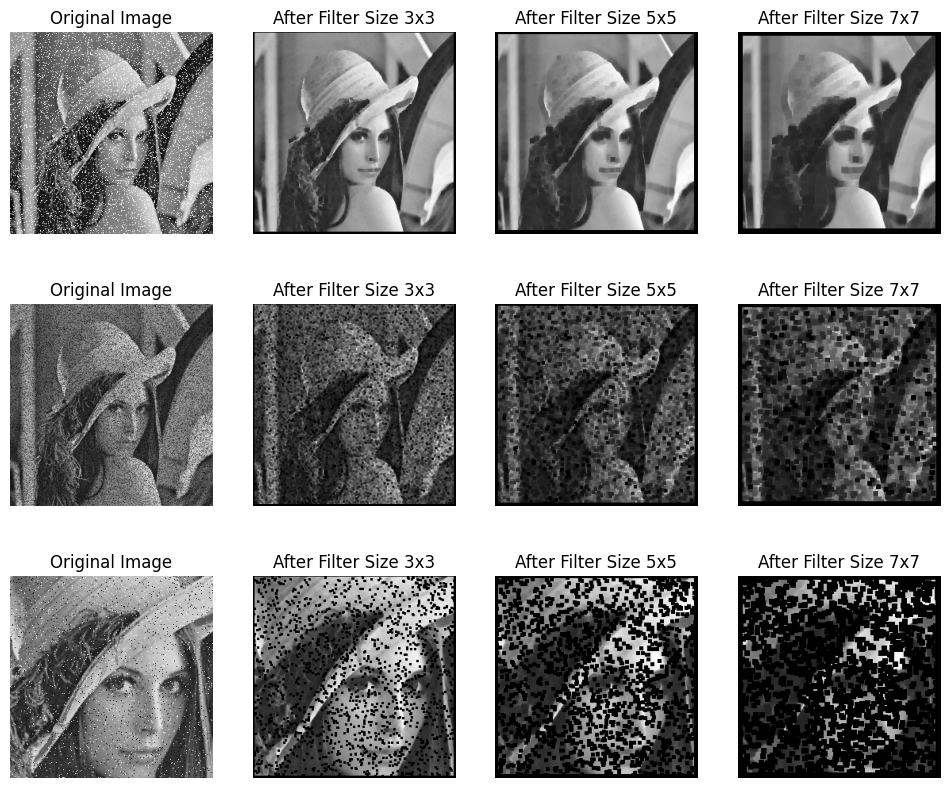

In [65]:
filter_plotter(images, kernels, min_filter)

## Max Filter

The max filter is a non-linear filter that is most commonly used as a simple way to reduce noise in an image. The max filter works by moving through the image pixel by pixel, replacing each value with the maximum value of neighboring pixels, including itself.


In [66]:
def max_filter(image, kernel):
    image_height, image_width = image.shape

    # Create a kernal array
    kernal_array = np.ones((kernel, kernel))
    kernal_array = kernal_array / (kernel * kernel)
    kernal_height, kernal_width = kernal_array.shape

    # Create a new image with the same size as the original image
    new_image = np.zeros(image.shape)

    # Iterate over every pixel of the image
    for i in range(kernel - 1, image_height - kernel):
        for j in range(kernel - 1, image_width - kernel):
            neighbourhood = image[i - math.floor(kernal_height / 2) : i + math.floor(kernal_height / 2) + 1, j - math.floor(kernal_width / 2) : j + math.floor(kernal_width / 2) + 1]

            # Chose the median value and store it in the new image
            new_image[i, j] = np.max(neighbourhood.flatten())

    return new_image

## Apllying Max Filter


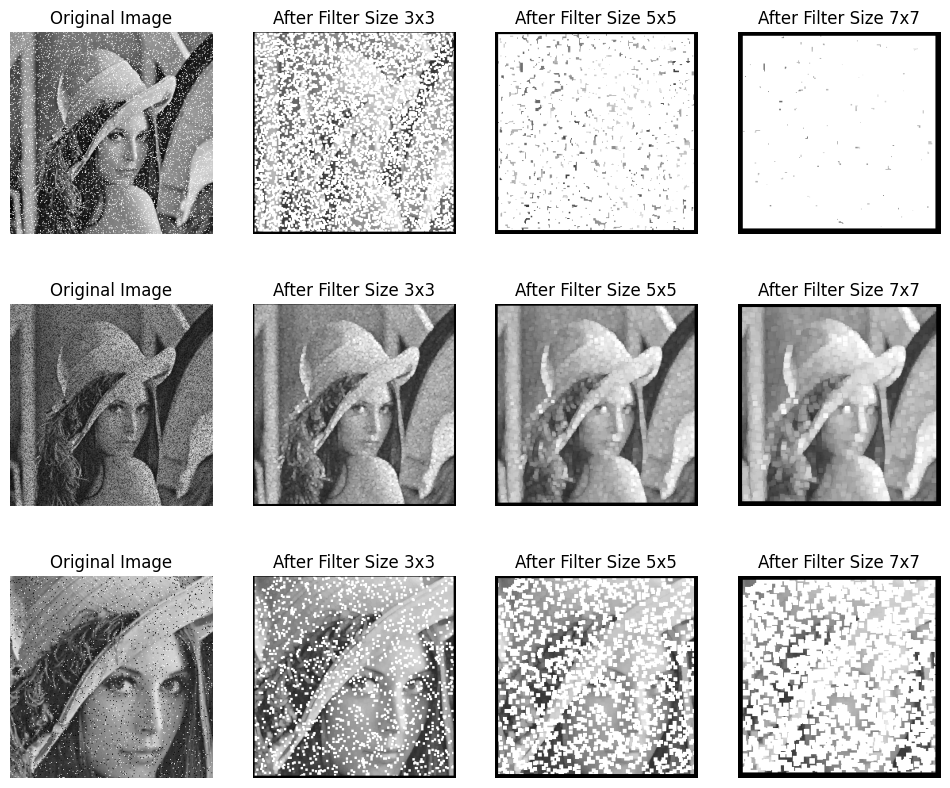

In [67]:
filter_plotter(images, kernels, max_filter)

## Median Filter

The median filter is a non-linear filter that is most commonly used as a simple way to reduce noise in an image. The median filter works by moving through the image pixel by pixel, replacing each value with the median value of neighboring pixels, including itself. The median filter is also called a rank filter.


In [61]:
def median_filter(image, kernel):
    image_height, image_width = image.shape

    # Create a kernal array
    kernal_array = np.ones((kernel, kernel))
    kernal_array = kernal_array / (kernel * kernel)
    kernal_height, kernal_width = kernal_array.shape

    # Create a new image with the same size as the original image
    new_image = np.zeros(image.shape)

    # Iterate over every pixel of the image
    for i in range(kernel - 1, image_height - kernel):
        for j in range(kernel - 1, image_width - kernel):
            neighbourhood = image[i - math.floor(kernal_height / 2) : i + math.floor(kernal_height / 2) + 1, j - math.floor(kernal_width / 2) : j + math.floor(kernal_width / 2) + 1]

            # Chose the median value and store it in the new image
            new_image[i, j] = np.median(neighbourhood.flatten())

    return new_image

## Apllying Median Filter


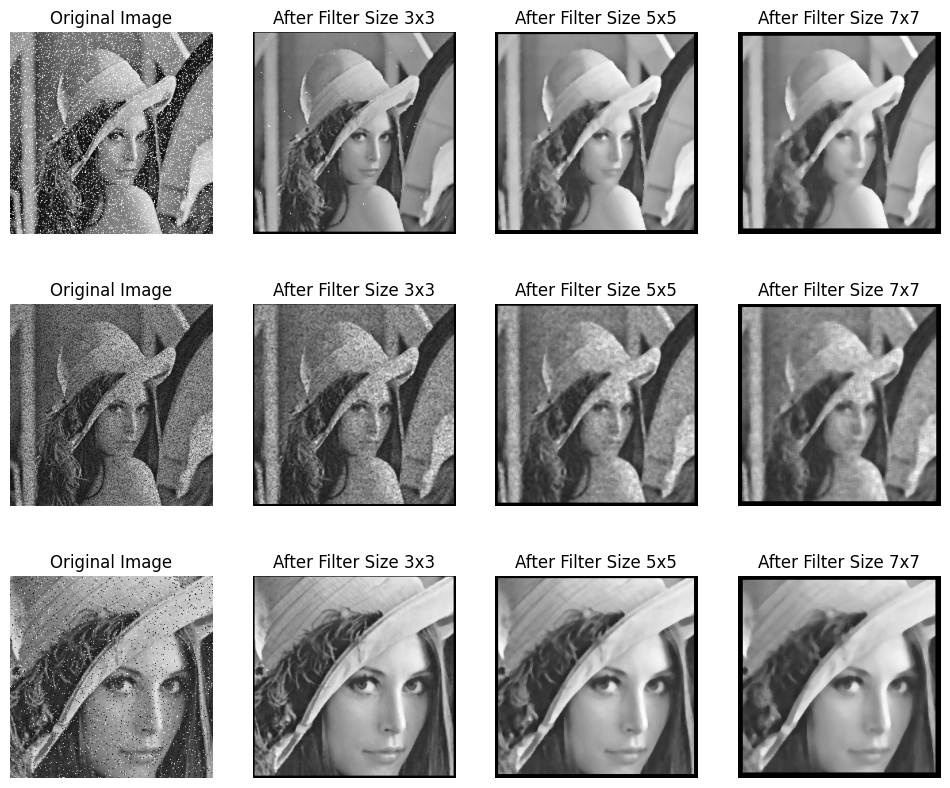

In [62]:
filter_plotter(images, kernels, median_filter)

---


## Conclusion

In this experiment, we have learnt to apply different filters on the image. We have also learnt to apply linear and non-linear filters on the image.
